In [1]:
import warnings
warnings.filterwarnings('ignore')
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set()

In [3]:
import pickle

In [4]:
with open('../archive/test_user.pkl','rb') as f:
    data_user = pickle.load(f)
with open('../archive/test_rev.pkl','rb') as f:
    data_review = pickle.load(f)
with open('../archive/test_biz.pkl','rb') as f:
    data_biz = pickle.load(f)

### Let's explore the datasets!

### Users dataset

In [5]:
data_user.head()

user_id      name  review_count        yelping_since  \
0  ntlvfPzc8eglqvk92iDIAw    Rafael           553  2007-07-06 03:27:11   
1  FOBRPlBHa3WPHFB5qYDlVg  Michelle           564  2008-04-28 01:29:25   
2  zZUnPeh2hEp0WydbAZEOOg    Martin            60  2008-08-28 23:40:05   
3  QaELAmRcDc5TfJEylaaP8g      John           206  2008-09-20 00:08:14   
4  xvu8G900tezTzbbfqmTKvA      Anne           485  2008-08-09 00:30:27   

   useful  funny  cool                                         elite  \
0     628    225   227                                                 
1     790    316   400                 2008,2009,2010,2011,2012,2013   
2     151    125   103                                          2010   
3     233    160    84                                          2009   
4    1265    400   512  2009,2010,2011,2012,2014,2015,2016,2017,2018   

                                             friends  fans  ...  \
0  oeMvJh94PiGQnx_6GlndPQ, wm1z1PaJKvHgSDRKfwhfDg...    14  ...   
1  ly7EnE8leJmyqyePVYFlug, pRlR63iDytsnnniPb3AOug...    27  ...   
2  Uwlk0txjQBPw_JhHsQnyeg, Ybxr1tSCkv3lYA0I1qmnPQ...     5  ...   
3  iog3Nyg1i4jeumiTVG_BSA, M92xWY2Vr9w0xoH8bPplfQ...     6  ...   
4  3W3ZMSthojCUirKEqAwGNw, eTIbuu23j9tOgmIa9POyLQ...    78  ...   

   compliment_more  compliment_profile  compliment_cute  compliment_list  \
0                2                   1                0                1   
1                4                   5                2                1   
2                6                   0                1                0   
3                1                   0                0                0   
4                9                   2                1                1   

   compliment_note  compliment_plain  compliment_cool  compliment_funny  \
0               11                15               22                22   
1               33                37               63                63   
2                3                 7               17                17   
3                7                14                7                 7   
4               22                28               31                31   

   compliment_writer  compliment_photos  
0                 10                  0  
1                 21                  5  
2                  4                  1  
3                  2                  0  
4                 19                 31  

[5 rows x 22 columns]

<AxesSubplot:xlabel='review_count', ylabel='Density'>

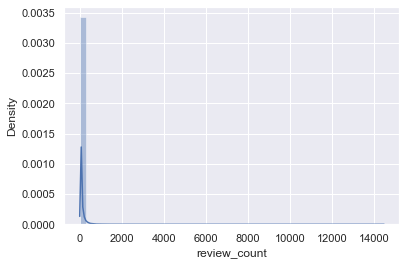

In [6]:
sns.distplot(data_user['review_count'])

This plot suggests that most users tend to not leave any reviews!

In [7]:
data_user['review_count'].describe()

count    1.968703e+06
mean     2.216930e+01
std      7.674226e+01
min      0.000000e+00
25%      2.000000e+00
50%      5.000000e+00
75%      1.500000e+01
max      1.445500e+04
Name: review_count, dtype: float64

In [8]:
data_user[data_user['review_count'] > 10].count() # Minimum of 10 user reviews

user_id               645518
name                  645518
review_count          645518
yelping_since         645518
useful                645518
funny                 645518
cool                  645518
elite                 645518
friends               645518
fans                  645518
average_stars         645518
compliment_hot        645518
compliment_more       645518
compliment_profile    645518
compliment_cute       645518
compliment_list       645518
compliment_note       645518
compliment_plain      645518
compliment_cool       645518
compliment_funny      645518
compliment_writer     645518
compliment_photos     645518
dtype: int64

In [9]:
data_user[data_user['elite'].apply(lambda x: len(str(x))>0)].count() # Elite users once or more than once

user_id               75961
name                  75961
review_count          75961
yelping_since         75961
useful                75961
funny                 75961
cool                  75961
elite                 75961
friends               75961
fans                  75961
average_stars         75961
compliment_hot        75961
compliment_more       75961
compliment_profile    75961
compliment_cute       75961
compliment_list       75961
compliment_note       75961
compliment_plain      75961
compliment_cool       75961
compliment_funny      75961
compliment_writer     75961
compliment_photos     75961
dtype: int64

### Let's do a conditional masking of the users where either the user has been elite at some point or had more than 10 reviews to his name.

In [10]:
imp_users = data_user[(data_user['review_count'] >= 10) | (data_user['elite'].apply(lambda x: len(str(x))>0))]

In [11]:
imp_users.head()

user_id      name  review_count        yelping_since  \
0  ntlvfPzc8eglqvk92iDIAw    Rafael           553  2007-07-06 03:27:11   
1  FOBRPlBHa3WPHFB5qYDlVg  Michelle           564  2008-04-28 01:29:25   
2  zZUnPeh2hEp0WydbAZEOOg    Martin            60  2008-08-28 23:40:05   
3  QaELAmRcDc5TfJEylaaP8g      John           206  2008-09-20 00:08:14   
4  xvu8G900tezTzbbfqmTKvA      Anne           485  2008-08-09 00:30:27   

   useful  funny  cool                                         elite  \
0     628    225   227                                                 
1     790    316   400                 2008,2009,2010,2011,2012,2013   
2     151    125   103                                          2010   
3     233    160    84                                          2009   
4    1265    400   512  2009,2010,2011,2012,2014,2015,2016,2017,2018   

                                             friends  fans  ...  \
0  oeMvJh94PiGQnx_6GlndPQ, wm1z1PaJKvHgSDRKfwhfDg...    14  ...   
1  ly7EnE8leJmyqyePVYFlug, pRlR63iDytsnnniPb3AOug...    27  ...   
2  Uwlk0txjQBPw_JhHsQnyeg, Ybxr1tSCkv3lYA0I1qmnPQ...     5  ...   
3  iog3Nyg1i4jeumiTVG_BSA, M92xWY2Vr9w0xoH8bPplfQ...     6  ...   
4  3W3ZMSthojCUirKEqAwGNw, eTIbuu23j9tOgmIa9POyLQ...    78  ...   

   compliment_more  compliment_profile  compliment_cute  compliment_list  \
0                2                   1                0                1   
1                4                   5                2                1   
2                6                   0                1                0   
3                1                   0                0                0   
4                9                   2                1                1   

   compliment_note  compliment_plain  compliment_cool  compliment_funny  \
0               11                15               22                22   
1               33                37               63                63   
2                3                 7               17                17   
3                7                14                7                 7   
4               22                28               31                31   

   compliment_writer  compliment_photos  
0                 10                  0  
1                 21                  5  
2                  4                  1  
3                  2                  0  
4                 19                 31  

[5 rows x 22 columns]

In [12]:
imp_user_ids = imp_users['user_id'].values

### Business dataset

In [13]:
data_biz.head()

business_id                      name  \
0  f9NumwFMBDn751xgFiRbNA  The Range At Lake Norman   
1  Yzvjg0SayhoZgCljUJRF9Q         Carlos Santo, NMD   
2  XNoUzKckATkOD1hP6vghZg                   Felinus   
3  6OAZjbxqM5ol29BuHsil3w      Nevada House of Hose   
4  51M2Kk903DFYI6gnB5I6SQ   USE MY GUY SERVICES LLC   

                     address             city state postal_code   latitude  \
0            10913 Bailey Rd        Cornelius    NC       28031  35.462724   
1  8880 E Via Linda, Ste 107       Scottsdale    AZ       85258  33.569404   
2      3554 Rue Notre-Dame O         Montreal    QC     H4C 1P4  45.479984   
3             1015 Sharp Cir  North Las Vegas    NV       89030  36.219728   
4         4827 E Downing Cir             Mesa    AZ       85205  33.428065   

    longitude  stars  review_count  is_open  \
0  -80.852612    3.5            36        1   
1 -111.890264    5.0             4        1   
2  -73.580070    5.0             5        1   
3 -115.127725    2.5             3        0   
4 -111.726648    4.5            26        1   

                                          attributes  \
0  {'BusinessAcceptsCreditCards': 'True', 'BikePa...   
1  {'GoodForKids': 'True', 'ByAppointmentOnly': '...   
2                                               None   
3  {'BusinessAcceptsCreditCards': 'True', 'ByAppo...   
4  {'BusinessAcceptsCreditCards': 'True', 'ByAppo...   

                                          categories  \
0  Active Life, Gun/Rifle Ranges, Guns & Ammo, Sh...   
1  Health & Medical, Fitness & Instruction, Yoga,...   
2                   Pets, Pet Services, Pet Groomers   
3  Hardware Stores, Home Services, Building Suppl...   
4  Home Services, Plumbing, Electricians, Handyma...   

                                               hours  
0  {'Monday': '10:0-18:0', 'Tuesday': '11:0-20:0'...  
1                                               None  
2                                               None  
3  {'Monday': '7:0-16:0', 'Tuesday': '7:0-16:0', ...  
4  {'Monday': '0:0-0:0', 'Tuesday': '9:0-16:0', '...

### We're interested in the restaurants! Let's filter those out!

In [14]:
data_restaurant = data_biz[data_biz['categories'].str.contains('Restaurant'or 'restaurant' or 'Food' or 'food')& data_biz['categories'].notna()]

Let's look at the distribution of the businesses

In [15]:
data_restaurant['state'].unique()

array(['IL', 'NC', 'ON', 'AZ', 'NV', 'OH', 'QC', 'PA', 'AB', 'SC', 'WI',
       'TX', 'CO', 'XWY', 'BC', 'HPL', 'NY', 'FL', 'VT', 'AR', 'HI', 'MB',
       'OR', 'WA', 'AL', 'CA', 'VA', 'NE'], dtype=object)

In [16]:
data_restaurant['city'].value_counts()

Toronto                      8681
Las Vegas                    6937
Phoenix                      4221
Montréal                     4097
Calgary                      3117
                             ... 
Schottsdale                     1
Sainte-Marguerite-Esterel       1
Hampstead                       1
Alberta                         1
Troy Township                   1
Name: city, Length: 813, dtype: int64

<AxesSubplot:ylabel='city'>

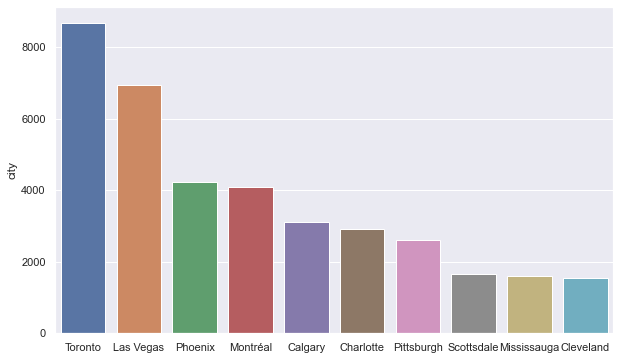

In [17]:
plt.figure(figsize = (10,6))
sns.barplot(x=data_restaurant['city'].value_counts()[:10].index, y=data_restaurant['city'].value_counts()[:10])

### Most number of restaurants are out there in Toronto. In the US, it's Las Vegas! Let's study the restaurants in Vegas!

In [56]:
vegas_restaurants = data_restaurant[data_restaurant['city'] == 'Las Vegas']

In [48]:
vegas_ids = vegas_restaurants['business_id'].values.tolist()
vegas_open_ids = vegas_restaurants.loc[vegas_restaurants['is_open']!=0]['business_id'].values.tolist()

In [53]:
len(vegas_ids),len(vegas_open_ids)

(2742, 2132)

In [19]:
vegas_restaurants['review_count'].describe()

count     6937.000000
mean       209.775551
std        470.820114
min          3.000000
25%         18.000000
50%         60.000000
75%        200.000000
max      10129.000000
Name: review_count, dtype: float64

Let's grab the restaurants with at least 100 reviews

In [57]:
vegas_restaurants = vegas_restaurants[vegas_restaurants['review_count']>= 100]

In [40]:
vegas_ids = vegas_restaurants['business_id'].values

### Reviews dataset

In [22]:
data_review.head()

review_id                 user_id             business_id  \
0  xQY8N_XvtGbearJ5X4QryQ  OwjRMXRC0KyPrIlcjaXeFQ  -MhfebM0QIsKt87iDN-FNw   
1  UmFMZ8PyXZTY2QcwzsfQYA  nIJD_7ZXHq-FX8byPMOkMQ  lbrU8StCq3yDfr-QMnGrmQ   
2  LG2ZaYiOgpr2DK_90pYjNw  V34qejxNsCbcgD8C0HVk-Q  HQl28KMwrEKHqhFrrDqVNQ   
3  i6g_oA9Yf9Y31qt0wibXpw  ofKDkJKXSKZXu5xJNGiiBQ  5JxlZaqCnk1MnbgRirs40Q   
4  6TdNDKywdbjoTkizeMce8A  UgMW8bLE0QMJDCkQ1Ax5Mg  IS4cv902ykd8wj1TR0N3-A   

   stars  useful  funny  cool  \
0    2.0       5      0     0   
1    1.0       1      1     0   
2    5.0       1      0     0   
3    1.0       0      0     0   
4    4.0       0      0     0   

                                                text                 date  
0  As someone who has worked with many museums, I...  2015-04-15 05:21:16  
1  I am actually horrified this place is still in...  2013-12-07 03:16:52  
2  I love Deagan's. I do. I really do. The atmosp...  2015-12-05 03:18:11  
3  Dismal, lukewarm, defrosted-tasting "TexMex" g...  2011-05-27 05:30:52  
4  Oh happy day, finally have a Canes near my cas...  2017-01-14 21:56:57

<AxesSubplot:xlabel='stars', ylabel='count'>

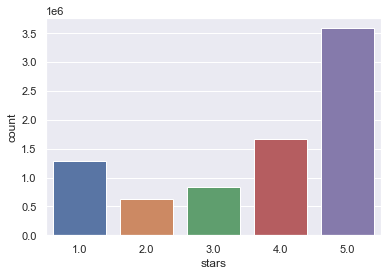

In [23]:
sns.countplot(x = 'stars',data = data_review)

The number of 5-star reviews is far higher than than any other rating.

### Now, we need to merge the reviews dataset on the users and business dataset to extract meaningful information.

In [50]:
vegas_reviews = data_review[data_review['user_id'].isin(imp_user_ids)&data_review['business_id'].isin(vegas_ids)]

In [58]:
vegas_restaurants = vegas_restaurants.loc[vegas_restaurants['is_open']!= 0]

In [34]:
vegas_restaurants.head()

business_id                     name  \
157  Yr_w9lakJrKMyEG_hI6zbA  Fat Moe's Pizza & Wings   
238  AN0bWhisCf6LN9eHZ7DQ3w    Los Olivos Ristorante   
246  AtD6B83S4Mbmq0t7iDnUVA             Veggie House   
308  oUX2bYbqjqST-urKbOHG6w              Loftti Cafe   
315  FiW6w5nmhlUoJAyNofb4jg         Fruits and Roots   

                              address       city state postal_code   latitude  \
157       6125 W Tropicana Ave, Ste F  Las Vegas    NV       89103  36.099361   
238              3759 E Desert Inn Rd  Las Vegas    NV       89121  36.129178   
246  5115 Spring Mountain Rd, Ste 203  Las Vegas    NV       89146  36.125569   
308       7729 S Rainbow Blvd, Ste 9B  Las Vegas    NV       89139  36.047942   
315              5020 Blue Diamond Rd  Las Vegas    NV       89139  36.032122   

      longitude  stars  review_count  is_open  \
157 -115.226636    4.0           141        1   
238 -115.092483    5.0           222        1   
246 -115.210911    4.5          1142        1   
308 -115.244167    4.5           284        1   
315 -115.210267    4.5           106        1   

                                            attributes  \
157  {'RestaurantsAttire': 'u'casual'', 'Restaurant...   
238  {'WiFi': 'u'free'', 'RestaurantsPriceRange2': ...   
246  {'RestaurantsPriceRange2': '2', 'BikeParking':...   
308  {'OutdoorSeating': 'True', 'BusinessParking': ...   
315  {'BusinessAcceptsCreditCards': 'True', 'DogsAl...   

                                            categories  \
157                 Pizza, Salad, Burgers, Restaurants   
238                               Restaurants, Italian   
246  Restaurants, Specialty Food, Japanese, Sushi B...   
308  Sandwiches, Shaved Ice, Coffee & Tea, Desserts...   
315  Coffee & Tea, Food Stands, Food, Restaurants, ...   

                                                 hours  
157  {'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...  
238  {'Monday': '0:0-0:0', 'Tuesday': '16:0-21:0', ...  
246  {'Monday': '11:30-21:30', 'Tuesday': '11:30-21...  
308  {'Monday': '0:0-0:0', 'Tuesday': '8:0-3:0', 'W...  
315                              {'Monday': '0:0-0:0'}

In [60]:
vegas_restaurants.drop(['stars','review_count','is_open','attributes','hours'],axis=1,inplace=True)

In [59]:
len(vegas_restaurants)

2132

In [43]:
vegas_reviews.head()

review_id                 user_id             business_id  \
16  bVTjZgRNq8ToxzvtiVrqMA  2hRe26HSCAWbFRn5WChK-Q  d4qwVw4PcN-_2mK2o1Ro1g   
21  TeX0eOIeZb_wpo86rCedXQ  RR-2nouBn408e3djxC470g  d4qwVw4PcN-_2mK2o1Ro1g   
24  XvLG7ReC8JZmBltOLJzfcA  -Co-ReNx_lXT1xL_Rr0B2g  XZbuPXdyA0ZtTu3AzqtQhg   
30  WGbtqQMeJwTVg6DFb156EQ  K5MSNpwRf0xKQSaC6gK9Cw  PL3cimEUfNHlenOGSOAdJg   
40  TkcxD1A4N_9kRZwGhUjDKA  bgG0jJyUXta_kczGrQW2Rw  7EZ4Eu7YJ1ltRCC5jXFJrQ   

    stars  useful  funny  cool  \
16    1.0       0      0     0   
21    5.0       0      0     0   
24    4.0       0      1     0   
30    4.0       3      0     1   
40    1.0       1      0     0   

                                                 text                 date  
16  10pm on a super bowl Sunday and they're alread...  2015-02-02 06:28:00  
21  Holy heck this place is amazing. I love their ...  2017-02-09 04:25:03  
24  As the previous person posted, what more can r...  2009-10-13 09:50:48  
30  This was our choice, by default, for New Year'...  2017-01-02 05:24:56  
40  There wasn't one specific thing that made this...  2013-04-10 16:19:12

## The dataset vegas_reviews contains all the user reviews left by important users for restaurants in the city of Las Vegas. 

In [51]:
with open('vegas_reviews.pkl','wb') as f:          # How to dump the data into pickle
    pickle.dump(vegas_reviews,f)

In [61]:
with open('vegas_restaurants.pkl','wb') as f:          # How to dump the data into pickle
    pickle.dump(vegas_restaurants,f)

In [54]:
# Dumping the ids in a json file
with open('vegas_ids.json', 'w') as fp:
    json.dump(vegas_ids, fp)
with open('vegas_open_ids.json', 'w') as fp:
    json.dump(vegas_open_ids, fp)

In [ ]:
# Reading the json file
with open('processed_texts.json', 'r') as fp:
    processed_texts = json.load(fp)